# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Step 2: Read in your data set

In [9]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

In [15]:
model = smf.ols(formula = 'admit ~ gpa + gre', data = df_raw).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     9.435
Date:                Thu, 31 Mar 2016   Prob (F-statistic):           9.94e-05
Time:                        17:07:03   Log-Likelihood:                -250.43
No. Observations:                 397   AIC:                             506.9
Df Residuals:                     394   BIC:                             518.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5110      0.210     -2.433      0.015        -0.924    -0.098
gpa            0.1505      0.065      2.305      0.022         0.022     0.279
gre            0.0005      0.000      2.521      0.012         0.000     0.001
==============================================================================
Omnibus:                      461.825   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.306
Skew:                           0.720   Prob(JB):                     4.87e-14
Kurtosis:                       1.722   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 2. Create a summary table.

In [29]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The min - max range for GRE is greater than the range for GPA

#### Question 4. Drop data points with missing data.


In [30]:
df_raw.dropna(inplace=True)

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

 df_raw.info() 

In [31]:
 df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [32]:
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA.

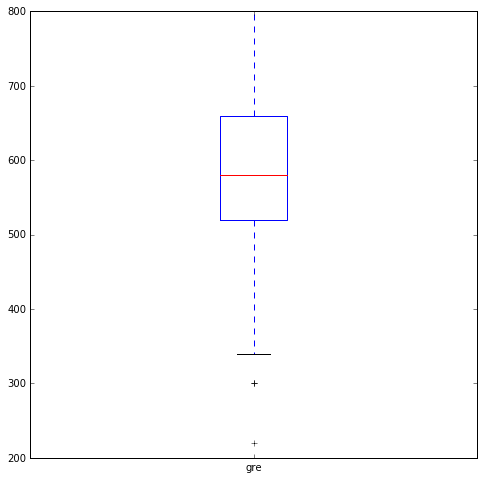

In [37]:
df_raw.gre.plot(kind = 'box', figsize = (8, 8))

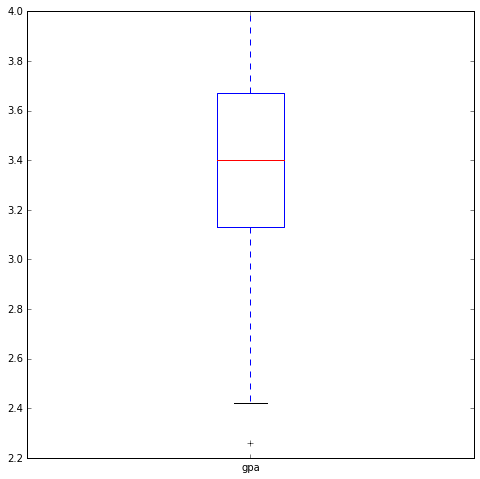

In [38]:
df_raw.gpa.plot(kind = 'box', figsize = (8, 8))

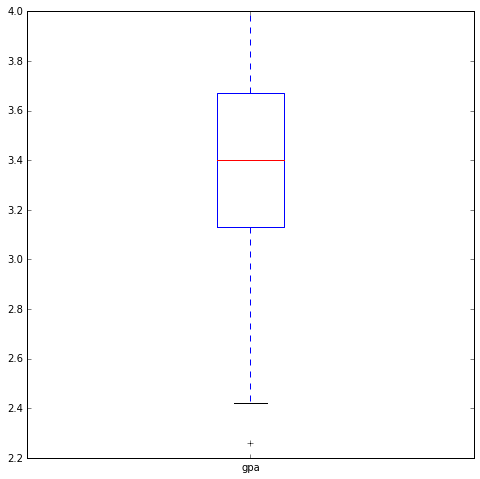

In [34]:
df_raw.gpa.plot(kind = 'box', figsize = (8, 8))

#### Question 7. What do this plots show?

Answer:  It shows min, max, median, 1Q and 4Q

#### Question 8. Describe each distribution.

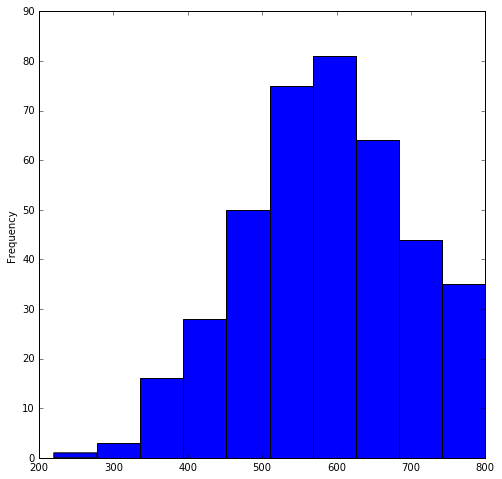

In [39]:
df_raw.gre.plot(kind = 'hist', figsize = (8, 8))

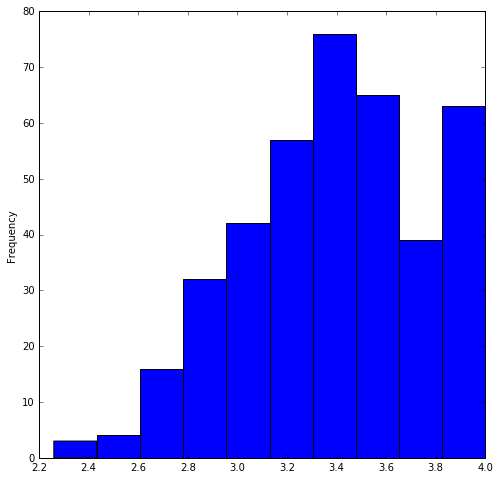

In [40]:
df_raw.gpa.plot(kind = 'hist', figsize = (8, 8))

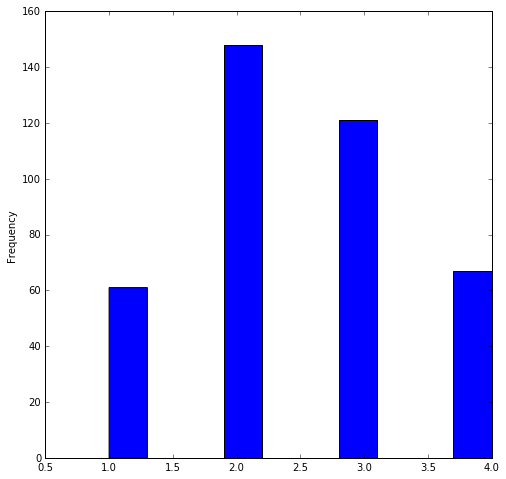

In [42]:
df_raw.prestige.plot(kind = 'hist', figsize = (8, 8))

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: Probably not. GPA and GRE are skewed to the right side of the chart

#### Question 10. Does this distribution need correction?  If so, why?  How?

We can change the data by dropping outliers

#### Question 11. Which of our variables are potentially colinear?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bc65810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c4bca90>]], dtype=object)

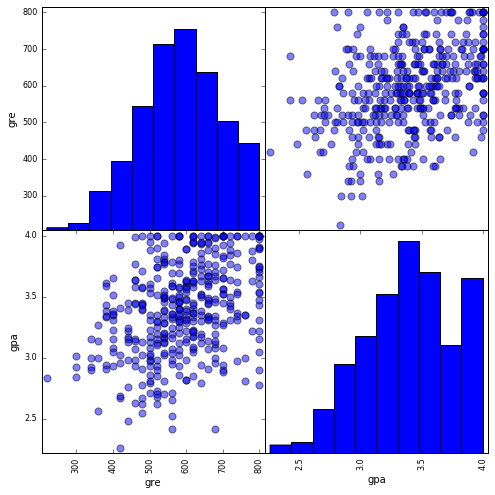

In [44]:
pd.tools.plotting.scatter_matrix(df_raw[ ['gre', 'gpa'] ], s = 200, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11db2ba10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ded4ad0>]], dtype=object)

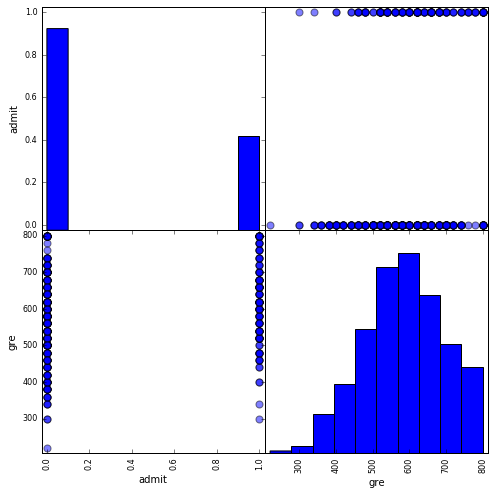

In [46]:
pd.tools.plotting.scatter_matrix(df_raw[ ['admit', 'gre'] ], s = 200, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e13c650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e4ee190>]], dtype=object)

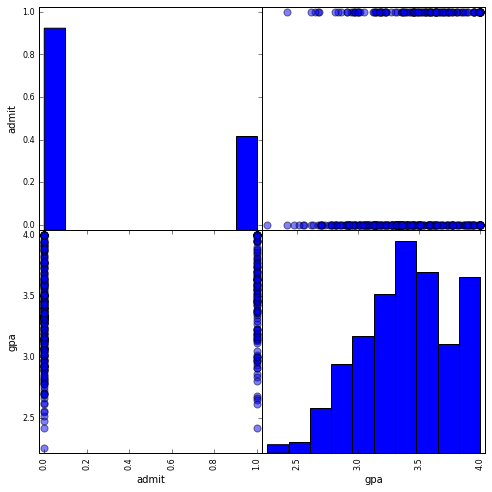

In [47]:
pd.tools.plotting.scatter_matrix(df_raw[ ['admit', 'gpa'] ], s = 200, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c5f4e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d9d5550>]], dtype=object)

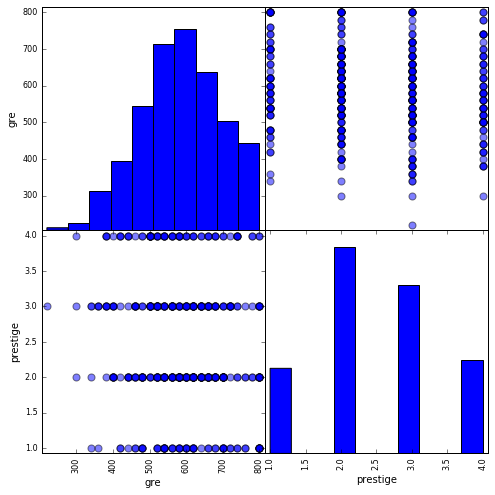

In [45]:
pd.tools.plotting.scatter_matrix(df_raw[ ['gre', 'prestige'] ], s = 200, figsize = (8, 8))

#### Question 12. What did you find?

Answer: GPA and GRE are correlated.  Prestige 1 tends to have higher GRE score. High GRE score tends to have admit 1

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: We should look at the acceptance rate by prestige of undergrade school

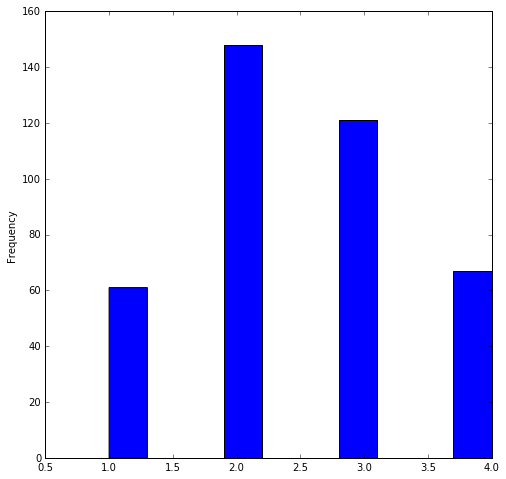

In [57]:
df_raw.prestige.plot(kind = 'hist', figsize = (8, 8))

#### Question 14. What is your hypothesis?

Answer: High academic backgroup tend to have higher chance admit to the school

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.